In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.00428233110967777, 0.4948102035752058, 0.11508306812985755, 0.009043083333213648, 0.003763381693388318, 0.4959743682546585, 0.0012847856406215795, 0.0014136551092553925, 0.004237787713401534, 0.3778224044015434]
    Error u of fuhe active learning(LHS sampling): 1.507715e-01
    [0.00045604090313484144, 0.06140743750950199, 0.006229224581071177, 0.0005540785645682675, 0.00046036649693991687, 0.059962646508573414, 0.0002632301631975943, 0.00026449285790932324, 0.0004489358270843411, 0.03764770211130151]
    MAE of fuhe active learning(LHS sampling): 1.676942e-02
    [6.921091002359169e-06, 0.09240412635069457, 0.004998468220644346, 3.086363950964886e-05, 5.3452818239436795e-06, 0.09283944545393634, 6.229818871925989e-07, 7.542251432106574e-07, 6.777858014724389e-06, 0.05387527336453719]
    MSE of fuhe active learning(LHS sampling): 2.441686e-02
    """,
    'Active': """
    [0.6063231638008062, 0.59413369069886, 0.23042553687375344, 0.5355238302038527, 0.5679925761833313, 0.28141774352400767, 0.06626014553507827, 0.6296642730309604, 0.3444257472082322, 0.7781100300510956]
    Error u of fuhe active learning(LHS sampling): 4.634277e-01
    [0.10158647859532369, 0.08344678168940037, 0.02104544215747715, 0.07700794402021774, 0.08613808472941, 0.021572398284718224, 0.003630859185882066, 0.09800669764007114, 0.030799118982687744, 0.1526761879821755]
    MAE of fuhe active learning(LHS sampling): 6.759100e-02
    [0.13874661366907612, 0.133223988587768, 0.020038965054470628, 0.10823598511857441, 0.121758528447034, 0.029889388136603273, 0.0016569860140290783, 0.14963465145170743, 0.04477187580204935, 0.22850520595387028]
    MSE of fuhe active learning(LHS sampling): 9.764622e-02
    """,
    'Residual': """
    [0.0015908442295945026, 0.004135597772210851, 0.005617392227208113, 0.0069625742936250175, 0.002235707361192807, 0.00808695753261522, 0.01631055596753674, 0.6757882331138769, 0.5247814588207679, 0.006501573133538659]
    Error u of fuhe active learning(LHS sampling): 1.252011e-01
    [0.0004089172804820133, 0.0005718082737105408, 0.0008332005755896537, 0.000813287157459349, 0.0004983565978974434, 0.0006364271836366381, 0.00125182172513681, 0.1287471555020324, 0.07126569994174828, 0.0007904165909348717]
    MAE of fuhe active learning(LHS sampling): 2.058171e-02
    [9.551451743078132e-07, 6.454916925046713e-06, 1.1909226903043303e-05, 1.8295899098122542e-05, 1.8864442948084866e-06, 2.468223010653523e-05, 0.00010040413557750125, 0.17235953863045725, 0.10393720568686303, 1.595331630764609e-05]
    MSE of fuhe active learning(LHS sampling): 2.764773e-02
    """,
    'Fuhe': """
    [0.0013316499588538365, 0.008292092831073334, 0.0029595378834249694, 0.023502073550272284, 0.0022191892264298747, 0.003273610161517001, 0.015686097676511638, 0.00612880243443672, 0.002086598936694936, 0.0007286249961699813]
    Error u of fuhe active learning(LHS sampling): 6.620828e-03
    [0.00035423325180540814, 0.0009161170545828888, 0.0005083038710139785, 0.00144824492043442, 0.0005359798012923267, 0.0005590679777511102, 0.0014295258057730928, 0.0006509133704835405, 0.0006209697491818115, 0.0003159672866116566]
    MAE of fuhe active learning(LHS sampling): 7.339323e-04
    [6.69259018006933e-07, 2.595029998867116e-05, 3.305688134055423e-06, 0.00020846177626048824, 1.8586719400667226e-06, 4.044529357073959e-06, 9.286325491049593e-05, 1.4176379004242247e-05, 1.6432060880707637e-06, 2.0036515833715315e-07]
    MSE of fuhe active learning(LHS sampling): 3.531734e-05
    """,
    'Fuhechaos': """
    [0.010462666158701325, 0.004637346921696384, 0.004607080913696785, 0.012707286175923012, 0.0030095551717117734, 0.0024534295581479146, 0.012208719593688078, 0.006755736866247401, 0.003273761695995322, 0.0033790706805265636]
    Error u of fuhe active learning(LHS sampling): 6.349465e-03
    [0.00104527122669801, 0.0007678380171354113, 0.0006754546173660849, 0.000983708187913679, 0.0006132988880440909, 0.0004923356175243695, 0.0009341296155981862, 0.0006745246195035473, 0.0006155303466899899, 0.0006071443526701044]
    MAE of fuhe active learning(LHS sampling): 7.409235e-04
    [4.131414868040868e-05, 8.116209439998764e-06, 8.010613006324537e-06, 6.0942419603331593e-05, 3.4183670250034926e-06, 2.2717537743383166e-06, 5.6254116731817145e-05, 1.722501159975125e-05, 4.04490380595522e-06, 4.309318799510889e-06]
    MSE of fuhe active learning(LHS sampling): 2.059069e-05
    """,
    'Chaos': """
    [0.2759847576660316, 0.12972678248371639, 0.07692084520718123, 0.5094870677330113, 0.5725038633743614, 0.44135903487479283, 0.40001317799106884, 0.11285853103263466, 0.617785040002337, 0.33383057828088186]
    Error u of fuhe active learning(LHS sampling): 3.470470e-01
    [0.06319232382202142, 0.032027779101258834, 0.004087278583305443, 0.061657321145714025, 0.08251849629252737, 0.04986031573097678, 0.043301783207451934, 0.00947818870564569, 0.09727828652278497, 0.03533187230197265]
    MAE of fuhe active learning(LHS sampling): 4.787336e-02
    [0.028746453064779392, 0.006351457045461195, 0.002233069125844485, 0.09796713364221712, 0.12370034626163105, 0.07351875000483425, 0.06038967184464405, 0.004807096696712015, 0.14404190176988302, 0.042059712658006475]
    MSE of fuhe active learning(LHS sampling): 5.838156e-02
    """,
    'Chaoschaos': """
    [0.23453794302451472, 0.30864287475927255, 0.4311106761713585, 0.610590107487307, 0.7379807202967508, 0.520971706347915, 0.046411469652300905, 0.17234893534668952, 0.059777691670643965, 0.9065334586505486]
    Error u of fuhe active learning(LHS sampling): 4.028906e-01
    [0.0198097895195485, 0.028850569281758068, 0.047176428412858275, 0.09959192349981456, 0.15632894069136555, 0.07445678494625453, 0.0026806503822575244, 0.01075551687701192, 0.0031656827574062297, 0.21494855419436082]
    MAE of fuhe active learning(LHS sampling): 6.577648e-02
    [0.020760618874498746, 0.03595229202591328, 0.07014417761869889, 0.1407063182621364, 0.20554366873407773, 0.10243357902048533, 0.0008129516439167991, 0.011210662592658526, 0.0013486285619061995, 0.31015711439802934]
    MSE of fuhe active learning(LHS sampling): 8.990700e-02
    """,
    '0.9Residual': """
    [0.00790125212378842, 0.002785415764382796, 0.011773522579372682, 0.004971737639777676, 0.011955151355342905, 0.003171749318904966, 0.015686097676511638, 0.05889856279082812, 0.008161316452346799, 0.6581121578809855]
    Error u of fuhe active learning(LHS sampling): 7.834170e-02
    [0.0007134693473200986, 0.0006161057827859597, 0.0009185240163227959, 0.0005782263180788944, 0.0011227070963759284, 0.0005499197724467504, 0.0014295258057730928, 0.005577663807873819, 0.000817003538210001, 0.12052582286887611]
    MAE of fuhe active learning(LHS sampling): 1.328490e-02
    [2.3561661478542517e-05, 2.928155459564009e-06, 5.231508242554325e-05, 9.328900849247325e-06, 5.3941650322686345e-05, 3.7967480835486246e-06, 9.286325491049593e-05, 0.0013092526658403112, 2.5138219118333577e-05, 0.16346090527813192]
    MSE of fuhe active learning(LHS sampling): 1.650340e-02
    """,
    '0.9Residualchaos': """
    [0.005990001683417833, 0.003636168329102712, 0.020566057427662515, 0.003302728934995247, 0.0023153511611452727, 0.030085696304707428, 0.012208719593688078, 0.0030512775475822016, 0.006438544474479445, 0.0013597961226441736]
    Error u of fuhe active learning(LHS sampling): 8.895434e-03
    [0.0008962552452245579, 0.0008031911387090768, 0.0015779254937025784, 0.00048525967642513697, 0.0005083856427677961, 0.0023705790244435898, 0.0009341296155981862, 0.0007476415629364036, 0.0005928387648475053, 0.0004869794875768713]
    MAE of fuhe active learning(LHS sampling): 9.403186e-04
    [1.3541537000612696e-05, 4.990017072092912e-06, 0.00015963060520866404, 4.116801569295584e-06, 2.023241890628771e-06, 0.0003416128561261821, 5.6254116731817145e-05, 3.5138037220778867e-06, 1.5645500894093235e-05, 6.978493347211772e-07]
    MSE of fuhe active learning(LHS sampling): 6.020263e-05
    """,
    '0.8Residual': """
    [0.006216115239279511, 0.034685897050475235, 0.00404541964862889, 0.0246793191609809, 0.0022088307043499882, 0.0038805882102153594, 0.015686097676511638, 0.006856396168616088, 0.002041978666133068, 0.0031078190555537404]
    Error u of fuhe active learning(LHS sampling): 1.034085e-02
    [0.0009908184693359081, 0.0025477044463287817, 0.0005765486740544831, 0.0019219487546362805, 0.0004477336106557135, 0.0005266259918734101, 0.0014295258057730928, 0.0009836959603169108, 0.0004618941456311361, 0.0005842505641204317]
    MAE of fuhe active learning(LHS sampling): 1.047075e-03
    [1.458317831613286e-05, 0.0004540669929997703, 6.176482721766509e-06, 0.0002298690075390142, 1.841360968822688e-06, 5.683412676837068e-06, 9.286325491049593e-05, 1.7742134979176992e-05, 1.573680171420777e-06, 3.6452349225672047e-06]
    MSE of fuhe active learning(LHS sampling): 8.280447e-05
    """,
    '0.8Residualchaos': """
    [0.0026692938214370504, 0.015000509292446203, 0.006960466679334243, 0.001661396210127337, 0.0017902140745360787, 0.0042020952034740105, 0.012208719593688078, 0.03872232575028363, 0.001083901472240717, 0.027712400643004335]
    Error u of fuhe active learning(LHS sampling): 1.120113e-02
    [0.0006289642306237633, 0.0013948228633591836, 0.0008257878011830067, 0.00046377547887164577, 0.0004843815976985258, 0.0005615877459776463, 0.0009341296155981862, 0.002723031570325753, 0.0003811523676218818, 0.001976302554052454]
    MAE of fuhe active learning(LHS sampling): 1.037394e-03
    [2.689099266621515e-06, 8.492314720557275e-05, 1.8284824211020468e-05, 1.0417427885334613e-06, 1.209550502550334e-06, 6.6641666230309025e-06, 5.6254116731817145e-05, 0.0005658964116711144, 4.4339795340554974e-07, 0.00028984270218991993]
    MSE of fuhe active learning(LHS sampling): 1.027249e-04
    """,
    '0.7Residual': """
    [0.052761562962274015, 0.0015874037807804468, 0.010831453977205594, 0.033636255623715874, 0.0028095873147815855, 0.025030344768271005, 0.015686097676511638, 0.0079374855071862, 0.001760097263415819, 0.007682602708903682]
    Error u of fuhe active learning(LHS sampling): 1.597229e-02
    [0.0045905159725897786, 0.0005678066144264612, 0.0008379742431076742, 0.0025717653735535264, 0.0006009460712248752, 0.002146612069322254, 0.0014295258057730928, 0.0008457951323420038, 0.0006180650787393978, 0.0010085451280266652]
    MAE of fuhe active learning(LHS sampling): 1.521755e-03
    [0.0010506289807468091, 9.510183407199235e-07, 4.4277958544573444e-05, 0.0004270014604847236, 2.9791964283929652e-06, 0.00023645458251095368, 9.286325491049593e-05, 2.377825403436167e-05, 1.1691962324531593e-06, 2.22756723850702e-05]
    MSE of fuhe active learning(LHS sampling): 1.902380e-04
    """,
    '0.7Residualchaos': """
    [0.010770122860156134, 0.008977673586861277, 0.007716028206822199, 0.03698282101605871, 0.003665266592974909, 0.005803827309945413, 0.012208719593688078, 0.0028062990239301807, 0.07038856813167604, 0.0037100665689575865]
    Error u of fuhe active learning(LHS sampling): 1.630294e-02
    [0.0009030357864883293, 0.001488673984426805, 0.0008210058824535143, 0.004075936010057098, 0.0005125664582539824, 0.0005498105672948318, 0.0009341296155981862, 0.0006294583836299242, 0.005640614485999464, 0.0007358932736787388]
    MAE of fuhe active learning(LHS sampling): 1.629112e-03
    [4.377794657501822e-05, 3.0418773150669398e-05, 2.2469928217392883e-05, 0.0005161954155990779, 5.07020137692884e-06, 1.2712853295385244e-05, 5.6254116731817145e-05, 2.972226912617472e-06, 0.0018698997919790483, 5.194903399155831e-06]
    MSE of fuhe active learning(LHS sampling): 2.564966e-04
    """,
    '0.6Residual': """
    [0.00317818494299867, 0.012699895399498925, 0.027143016556663953, 0.011416964271928603, 0.002488524164634663, 0.008679037901236334, 0.015686097676511638, 0.018980570747168957, 0.009544484128587502, 0.0060245964798572235]
    Error u of fuhe active learning(LHS sampling): 1.158414e-02
    [0.0005065376913164069, 0.0012549538010360425, 0.002393281449713635, 0.000873954940959144, 0.00041953903656372646, 0.0008925810352838335, 0.0014295258057730928, 0.0019761001708612693, 0.0007376526856762388, 0.0006820205720917899]
    MAE of fuhe active learning(LHS sampling): 1.116615e-03
    [3.8121712650710495e-06, 6.087154989784621e-05, 0.0002780547349784154, 4.9194364629880865e-05, 2.337210326125117e-06, 2.8428715786716868e-05, 9.286325491049593e-05, 0.0001359667156182747, 3.438103860986275e-05, 1.3698404907395327e-05]
    MSE of fuhe active learning(LHS sampling): 6.996082e-05
    """,
    '0.6Residualchaos': """
    [0.007524436242216369, 0.004488294676477943, 0.014526300673471538, 0.0030576712583705833, 0.0024244591354142964, 0.012443081949687998, 0.012208719593688078, 0.003946780423698244, 0.006010401834881671, 0.001786900042417418]
    Error u of fuhe active learning(LHS sampling): 6.841705e-03
    [0.0006795673016309961, 0.0006208110194795204, 0.0015599746444447723, 0.0004687034740835302, 0.0005960103164865488, 0.000998454318200435, 0.0009341296155981862, 0.0006738139758028487, 0.0008838144026423842, 0.00035392533721202886]
    MAE of fuhe active learning(LHS sampling): 7.769204e-04
    [2.136790799299449e-05, 7.602856560516985e-06, 7.963869415215339e-05, 3.528544946063558e-06, 2.2184201877256077e-06, 5.84345891121675e-05, 5.6254116731817145e-05, 5.878953195908487e-06, 1.3633930903604557e-05, 1.2050764242514618e-06]
    MSE of fuhe active learning(LHS sampling): 2.497631e-05
    """,
    '0.4Residual': """
    [0.09627386767763006, 0.3256653593222804, 0.007732715897550287, 0.005238732623811142, 0.0064275493434047, 0.03150330020864781, 0.015686097676511638, 0.005268226590757582, 0.018299858804730753, 0.010064803114946792]
    Error u of fuhe active learning(LHS sampling): 5.221605e-02
    [0.005580771723914202, 0.044042183756312435, 0.0006961704358229242, 0.0005123190756184468, 0.0006467138001584621, 0.002899436758348937, 0.0014295258057730928, 0.0008290917679277315, 0.0012796877760050049, 0.0010444663684233428]
    MAE of fuhe active learning(LHS sampling): 5.896037e-03
    [0.0034980894494958063, 0.04002738357601674, 2.2567226123408917e-05, 1.0357776570528702e-05, 1.559211073723961e-05, 0.00037456412178121437, 9.286325491049593e-05, 1.0474733055508378e-05, 0.0001263890791340411, 3.823179064511809e-05]
    MSE of fuhe active learning(LHS sampling): 4.421651e-03
    """,
    '0.4Residualchaos': """
    [0.005211463669494712, 0.0022969376419586843, 0.006711087682446177, 0.004141208480327481, 0.0027627161908414808, 0.003452034191945128, 0.012208719593688078, 0.0017290193427550197, 0.0037091034571415105, 0.008246619934412001]
    Error u of fuhe active learning(LHS sampling): 5.046891e-03
    [0.0007991945483424499, 0.00038383741452379885, 0.0006757533471820561, 0.0007108944032387698, 0.000547277681776618, 0.0004959492270964913, 0.0009341296155981862, 0.000482048732770087, 0.0007247715835398168, 0.001079659933718134]
    MAE of fuhe active learning(LHS sampling): 6.833516e-04
    [1.0250227415073401e-05, 1.9911889880332875e-06, 1.6998081137323008e-05, 6.472443398411016e-06, 2.8806242844329063e-06, 4.4974283090767255e-06, 5.6254116731817145e-05, 1.1282719089297553e-06, 5.19220661550315e-06, 2.566646338824103e-05]
    MSE of fuhe active learning(LHS sampling): 1.313311e-05
    """,

    '0.3Residual': """
    [0.0015724259423412284, 0.0018159575342093636, 0.002402239639421364, 0.017116024915319838, 0.006352370084598258, 0.010002833450750042, 0.015686097676511638, 0.007467156223166026, 0.004097714668519466, 0.0021794466848969792]
    Error u of fuhe active learning(LHS sampling): 6.869227e-03
    [0.0003994028101148771, 0.0003600477445018932, 0.00043046962737154686, 0.0016048553918507006, 0.0009394789907943773, 0.0011495213684487155, 0.0014295258057730928, 0.0009591084990365632, 0.000657283919373581, 0.0005265135475955488]
    MAE of fuhe active learning(LHS sampling): 8.456208e-04
    [9.331564719820448e-07, 1.244587539665302e-06, 2.1779441053051137e-06, 0.00011056556558696953, 1.522950036110919e-05, 3.776244862120482e-05, 9.286325491049593e-05, 2.104381846870699e-05, 6.33720127070718e-06, 1.7926956753347145e-06]
    MSE of fuhe active learning(LHS sampling): 2.899502e-05
    """,
    '0.3Residualchaos': """
    [0.026688910121484784, 0.009378353852334279, 0.004219571716582556, 0.033575551611013485, 0.014027012549715355, 0.0017575295187123607, 0.012208719593688078, 0.00544340357512926, 0.004233012732769427, 0.003800652613596789]
    Error u of fuhe active learning(LHS sampling): 1.153327e-02
    [0.0017709590407834334, 0.001132654888833616, 0.00059488537640865, 0.002782161039826628, 0.00137510119505287, 0.0003862933740579827, 0.0009341296155981862, 0.0007118258910092952, 0.0005313673888252483, 0.0005497064673890016]
    MAE of fuhe active learning(LHS sampling): 1.076908e-03
    [0.0002688287731807189, 3.3194589458571e-05, 6.71971443027996e-06, 0.0004254616153503397, 7.425820429288496e-05, 1.165787321372149e-06, 5.6254116731817145e-05, 1.1182917996005281e-05, 6.762592546237717e-06, 5.4516808560505194e-06]
    MSE of fuhe active learning(LHS sampling): 8.892800e-05
    """,
    '0.2Residual': """
    [0.004485820871193505, 0.004291552501535658, 0.01408257288864568, 0.02382331573918413, 0.8568962362460987, 0.0020273201525360753, 0.015686097676511638, 0.00976765380273995, 0.007805740143892516, 0.16311141785709782]
    Error u of fuhe active learning(LHS sampling): 1.101978e-01
    [0.0006309056431718584, 0.000985756262588026, 0.0009632054466828508, 0.0014924026868230488, 0.20718623867405608, 0.0005239595631059028, 0.0014295258057730928, 0.0009909748097089767, 0.0008017103648784739, 0.01706916668594487]
    MAE of fuhe active learning(LHS sampling): 2.320738e-02
    [7.594477964676248e-06, 6.950930268163812e-06, 7.484763587087261e-05, 0.00021419951597867348, 0.2771217050301393, 1.5511676785454796e-06, 9.286325491049593e-05, 3.600763425693499e-05, 2.2995467886916747e-05, 0.010041134803839662]
    MSE of fuhe active learning(LHS sampling): 2.876198e-02
    """,
    '0.2Residualchaos': """
    [0.0027362398821765216, 0.06269343391154579, 0.02848600585603619, 0.0026586308817194188, 0.007867300020875405, 0.0016185907988312603, 0.012208719593688078, 0.010988553685452006, 0.0026591978202406244, 0.0034801775741512774]
    Error u of fuhe active learning(LHS sampling): 1.353969e-02
    [0.0006358406897590203, 0.0036780940936852863, 0.0027944131754092574, 0.0004212171989205677, 0.0007189520207737751, 0.0003881137058244881, 0.0009341296155981862, 0.0011208641768799136, 0.0005176486802986541, 0.0005838554254545156]
    MAE of fuhe active learning(LHS sampling): 1.179313e-03
    [2.82567630110403e-06, 0.001483399704307746, 0.00030625077070468404, 2.6676580658081924e-06, 2.3359605098041563e-05, 9.887538927162765e-07, 5.6254116731817145e-05, 4.557169063010569e-05, 2.6687959141530936e-06, 4.571059560496487e-06]
    MSE of fuhe active learning(LHS sampling): 1.928558e-04
    """,
    '0.1Residual': """
    [0.002661129228913527, 0.004022277588115764, 0.0221181133261648, 0.02465775374041146, 0.003003490858239239, 0.018163466392569733, 0.015686097676511638, 0.005389862330815556, 0.037304667240401566, 0.0047270947049400875]
    Error u of fuhe active learning(LHS sampling): 1.377340e-02
    [0.0005694959805024945, 0.0006233243069103889, 0.001467664817095119, 0.0017541772217008113, 0.0004507191979386707, 0.0016244385380404782, 0.0014295258057730928, 0.0008212490991886683, 0.004174428640367483, 0.0005966120952361731]
    MAE of fuhe active learning(LHS sampling): 1.351164e-03
    [2.6726740818000537e-06, 6.106018982099964e-06, 0.00018463338403184687, 0.00022946745221915304, 3.40460474965601e-06, 0.00012451209521130747, 9.286325491049593e-05, 1.0964009843806343e-05, 0.0005252189808915258, 8.43339958761171e-06]
    MSE of fuhe active learning(LHS sampling): 1.188276e-04
    """,
    '0.1ResidualChaos': """
    [0.0015105456442731063, 0.022659421208297288, 0.011939511350745073, 0.0012234491642951113, 0.004111440274264209, 0.17172322994523748, 0.012208719593688078, 0.005265698484693848, 0.00444652697599694, 0.004728755225703298]
    Error u of fuhe active learning(LHS sampling): 2.398173e-02
    [0.0004175396908357908, 0.002104981079510321, 0.0009157242706894974, 0.00034343577177857053, 0.0005764904364569514, 0.010314861771893358, 0.0009341296155981862, 0.0008781565266459956, 0.0006118843773084153, 0.0007026314531083988]
    MAE of fuhe active learning(LHS sampling): 1.779983e-03
    [8.611558926295886e-07, 0.0001937812248824489, 5.3800607220120085e-05, 5.649186714786638e-07, 6.379726243522928e-06, 0.011129410694320043, 5.6254116731817145e-05, 1.0464682279667153e-05, 7.462011855127991e-06, 8.439325550854754e-06]
    MSE of fuhe active learning(LHS sampling): 1.146742e-03
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))

    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

              Method   Metric  \
0               PINN  Error_u   
1               PINN      MAE   
2               PINN      MSE   
3             Active  Error_u   
4             Active      MAE   
..               ...      ...   
64       0.1Residual      MAE   
65       0.1Residual      MSE   
66  0.1ResidualChaos  Error_u   
67  0.1ResidualChaos      MAE   
68  0.1ResidualChaos      MSE   

                                               Values  
0   [0.00428233110967777, 0.4948102035752058, 0.11...  
1   [0.00045604090313484144, 0.06140743750950199, ...  
2   [6.921091002359169e-06, 0.09240412635069457, 0...  
3   [0.6063231638008062, 0.59413369069886, 0.23042...  
4   [0.10158647859532369, 0.08344678168940037, 0.0...  
..                                                ...  
64  [0.0005694959805024945, 0.0006233243069103889,...  
65  [2.6726740818000537e-06, 6.106018982099964e-06...  
66  [0.0015105456442731063, 0.022659421208297288, ...  
67  [0.0004175396908357908, 0.0021049810795

In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.00428233110967777, 0.4948102035752058, 0.11508306812985755, 0.009043083333213648, 0.003763381693388318, 0.4959743682546585, 0.0012847856406215795, 0.0014136551092553925, 0.004237787713401534, 0.3778224044015434], 'Active': [0.6063231638008062, 0.59413369069886, 0.23042553687375344, 0.5355238302038527, 0.5679925761833313, 0.28141774352400767, 0.06626014553507827, 0.6296642730309604, 0.3444257472082322, 0.7781100300510956], 'Residual': [0.0015908442295945026, 0.004135597772210851, 0.005617392227208113, 0.0069625742936250175, 0.002235707361192807, 0.00808695753261522, 0.01631055596753674

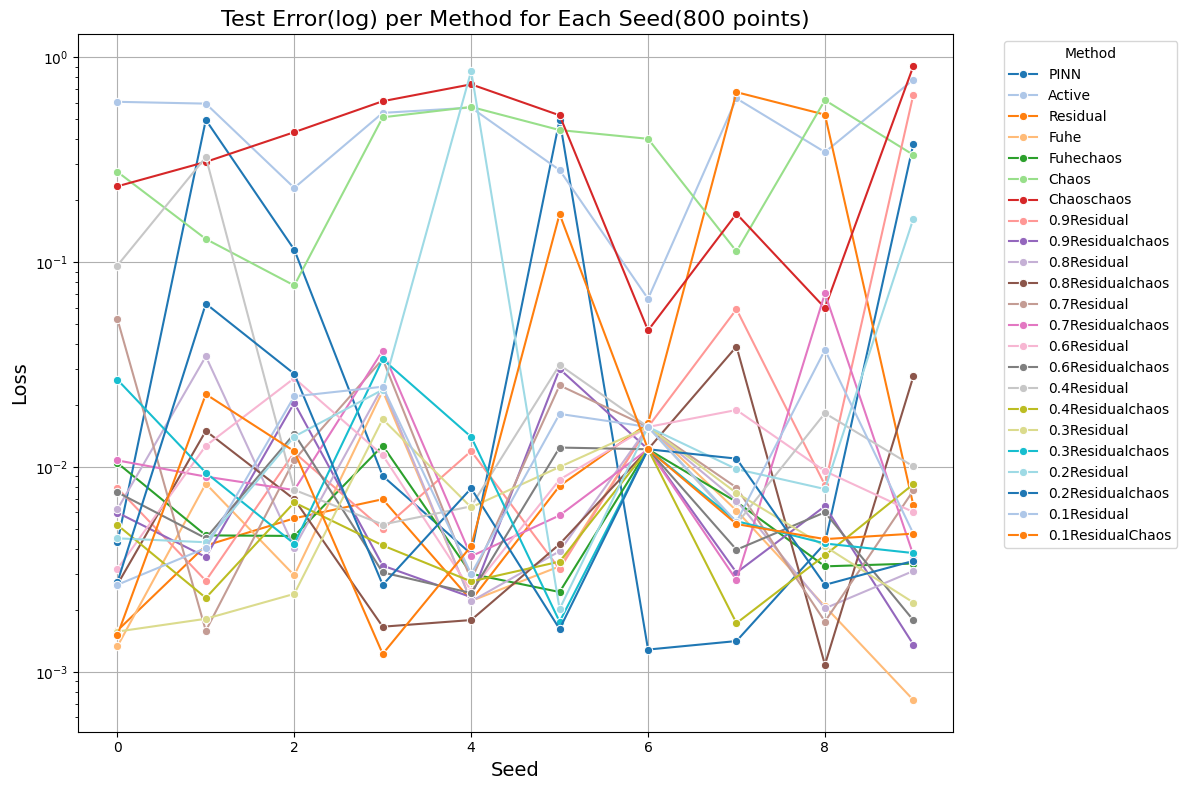

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

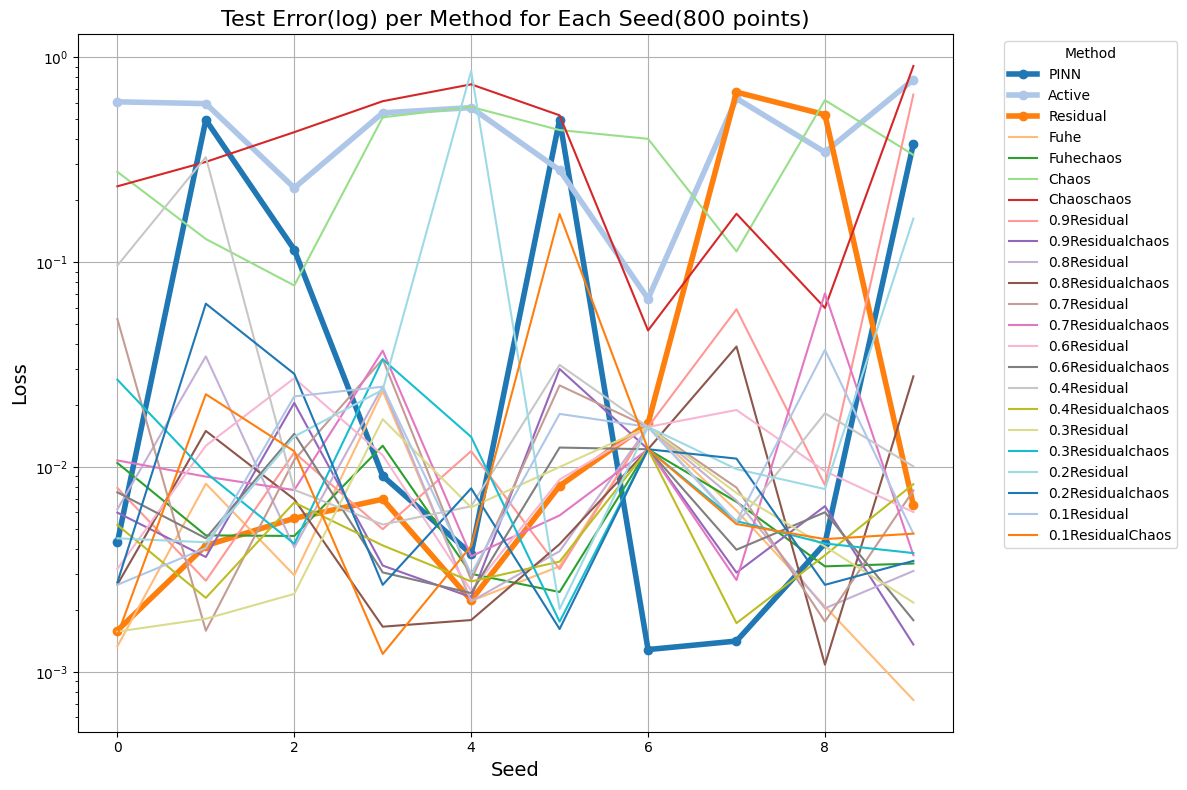

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active',"Xianxing","25000PINN","tongchengbenPINN","25000Xianxing","tongchengbenXianxing"]
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\959944533.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


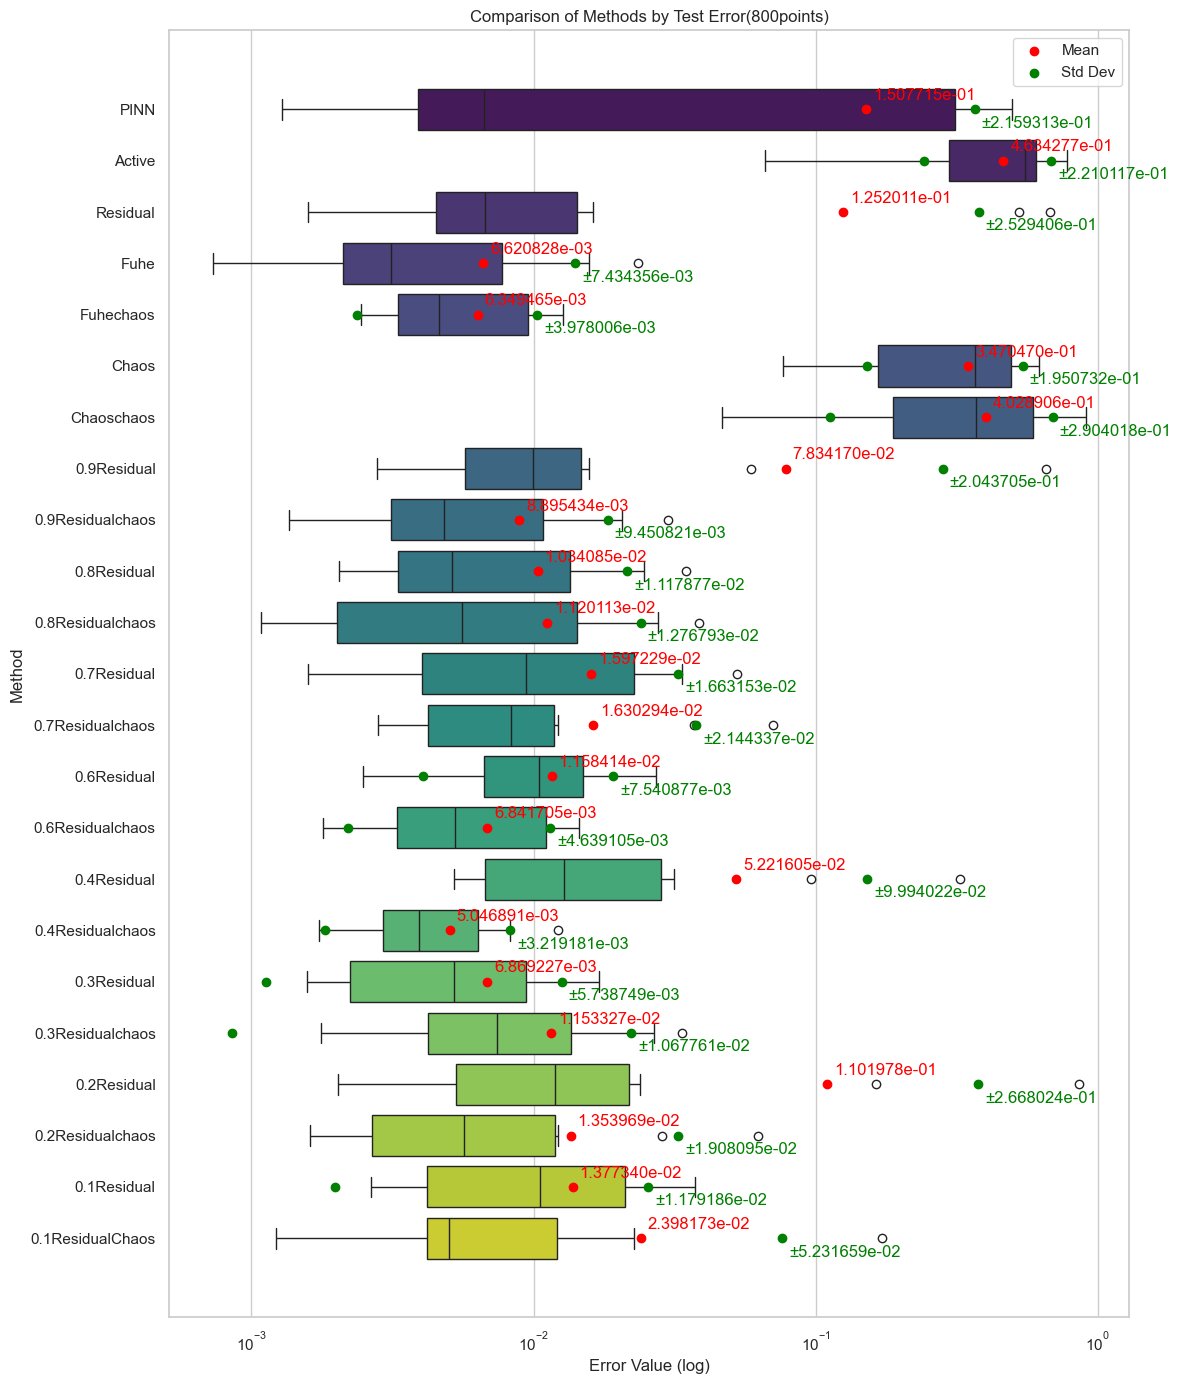

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [7]:
(8.796e-2-3.225e-2)/8.796e-2

0.633356070941337

C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\592110665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


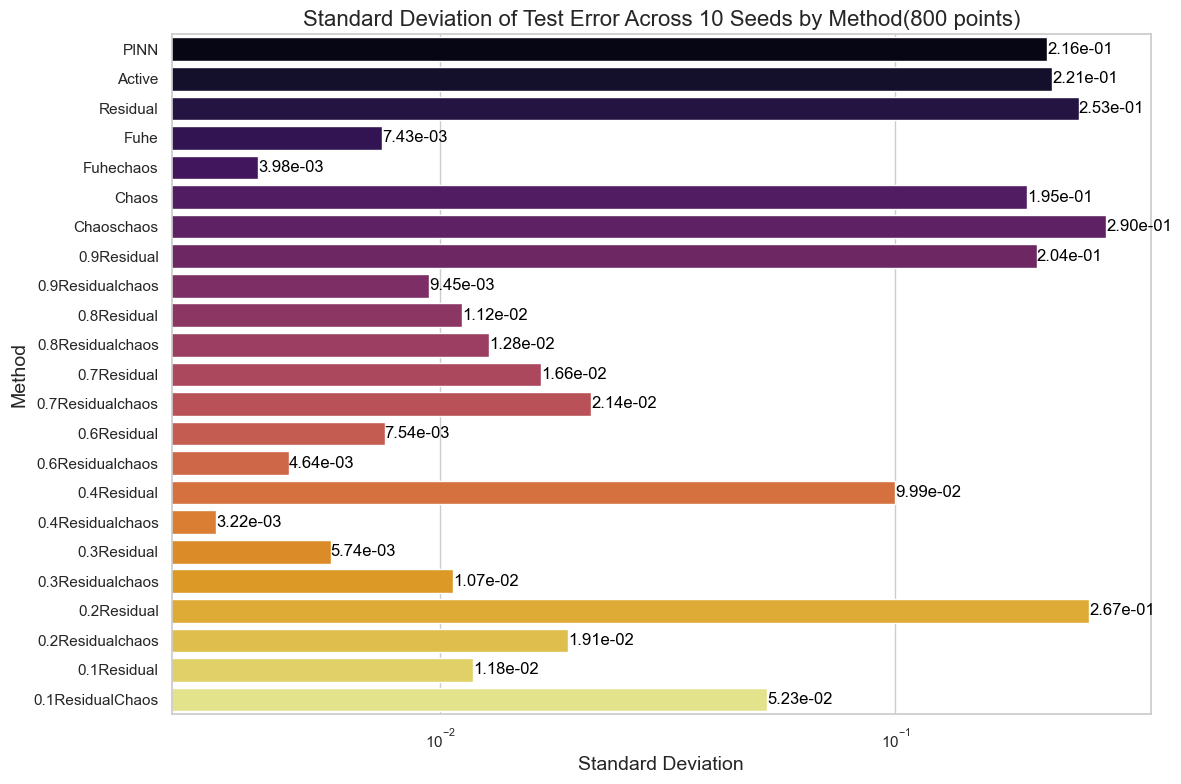

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

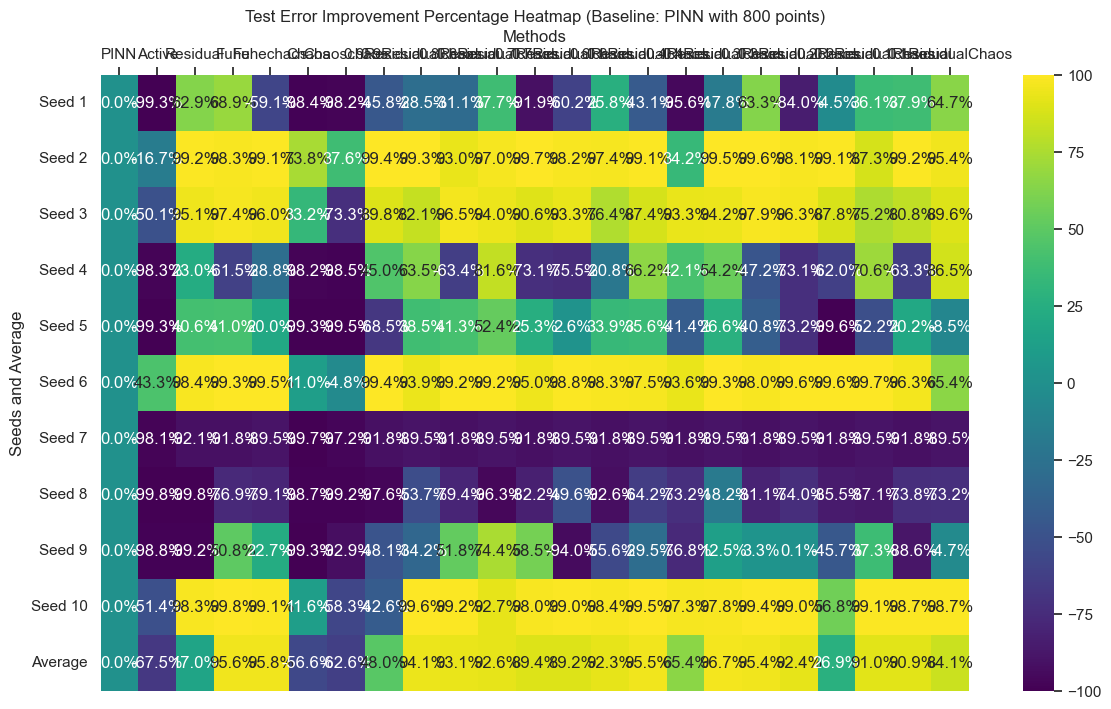

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



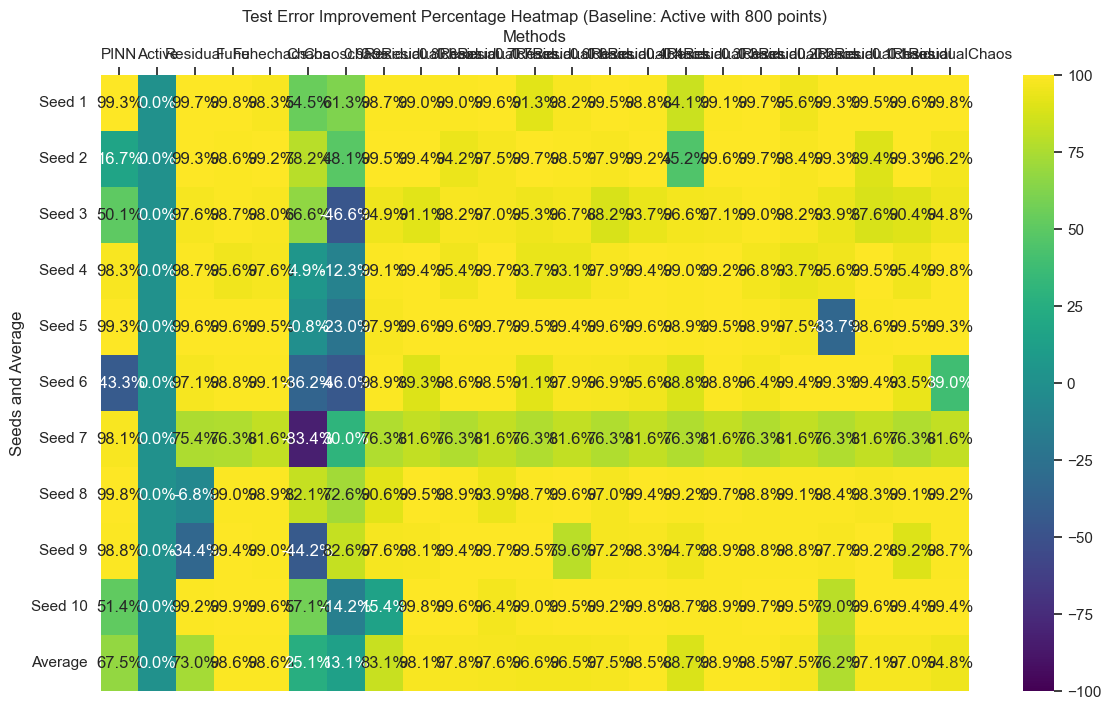

In [10]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



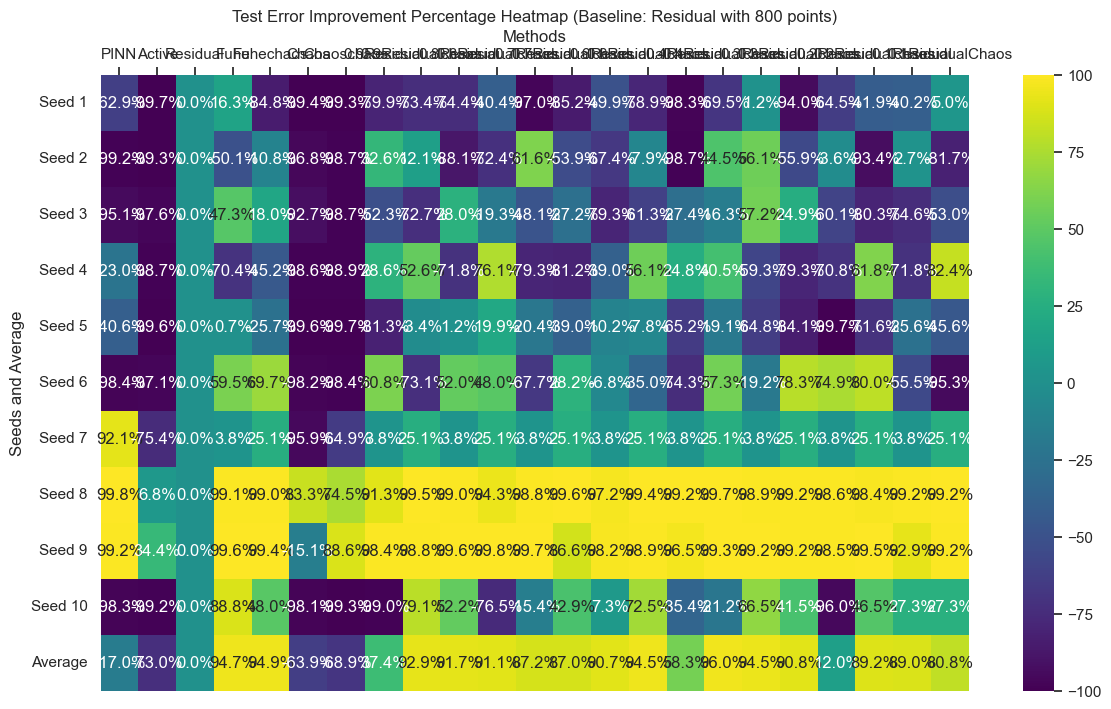

In [11]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



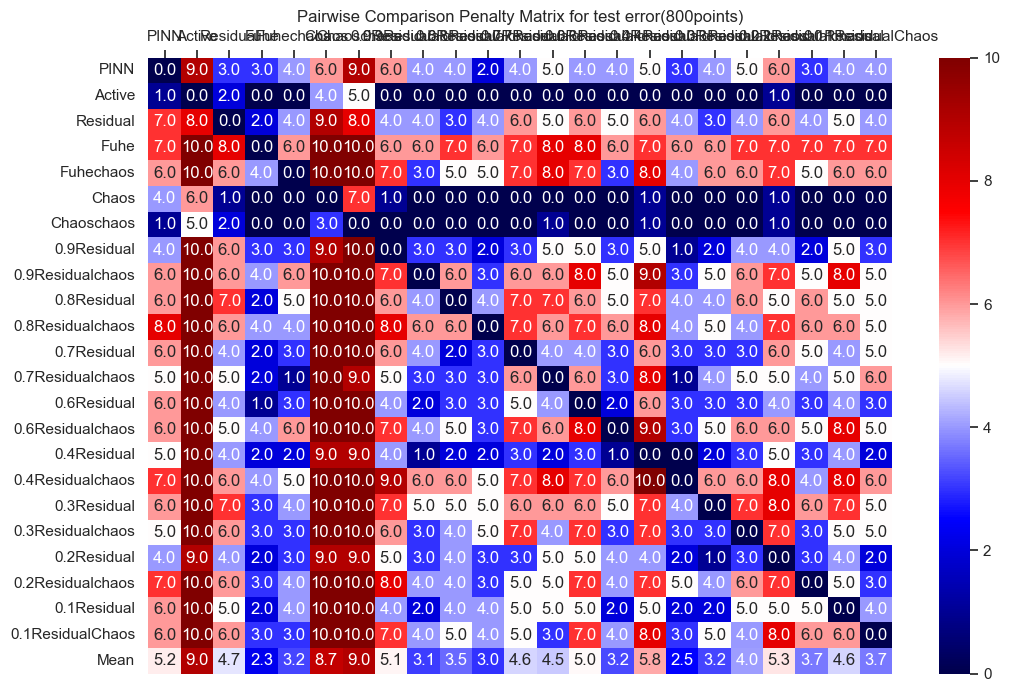

In [12]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [13]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.00045604090313484144, 0.06140743750950199, 0.006229224581071177, 0.0005540785645682675, 0.00046036649693991687, 0.059962646508573414, 0.0002632301631975943, 0.00026449285790932324, 0.0004489358270843411, 0.03764770211130151], 'Active': [0.10158647859532369, 0.08344678168940037, 0.02104544215747715, 0.07700794402021774, 0.08613808472941, 0.021572398284718224, 0.003630859185882066, 0.09800669764007114, 0.030799118982687744, 0.1526761879821755], 'Residual': [0.0004089172804820133, 0.0005718082737105408, 0.0008332005755896537, 0.000813287157459349, 0.0004983565978974434, 0.000636427183636

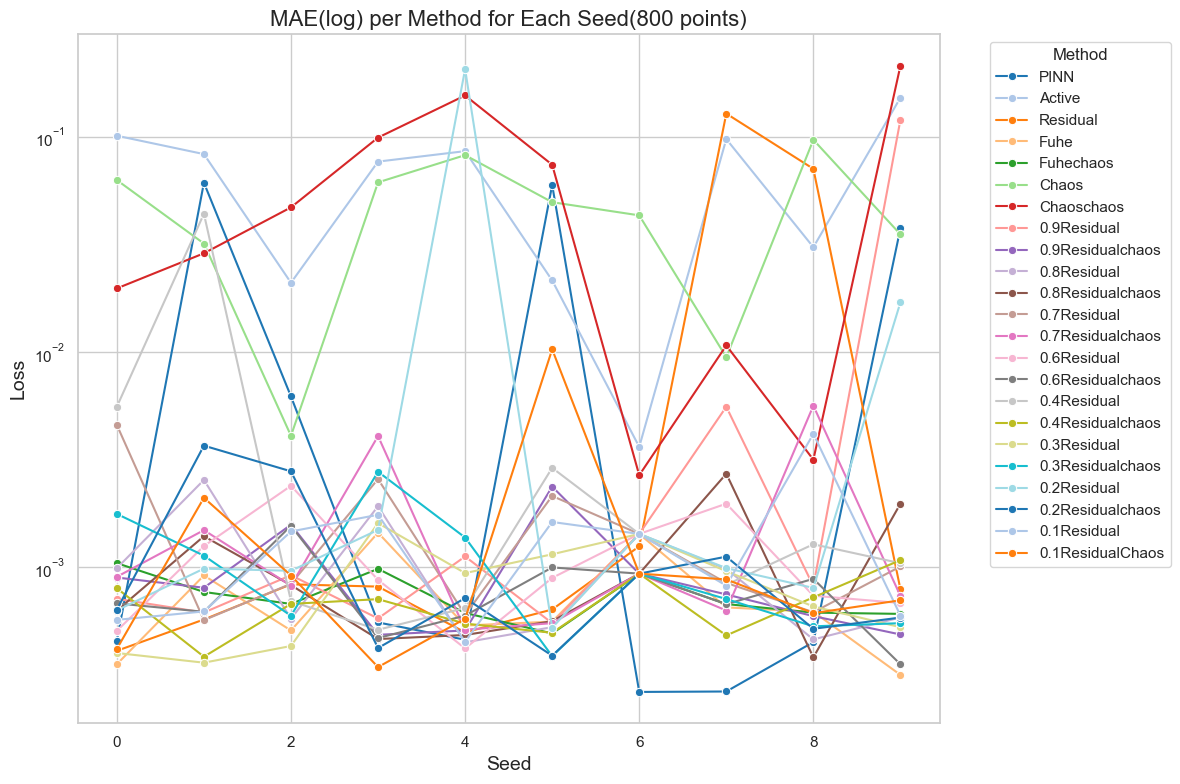

In [14]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

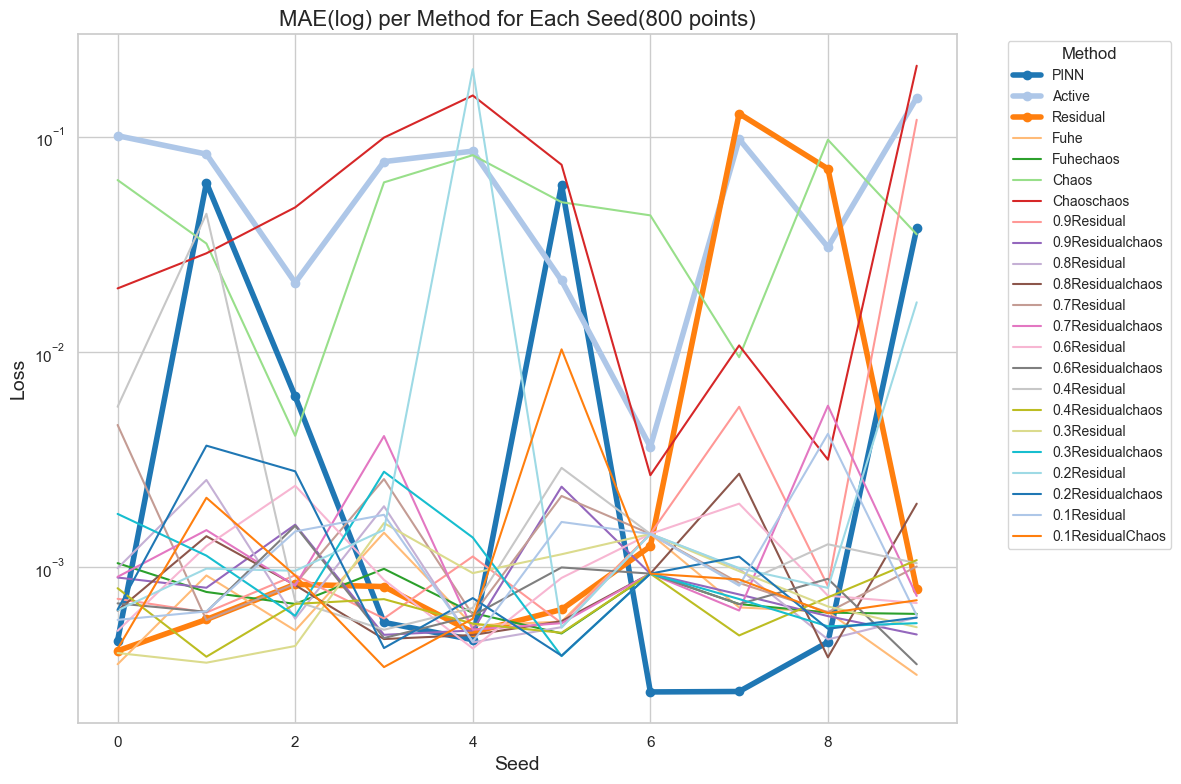

In [15]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\822122591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


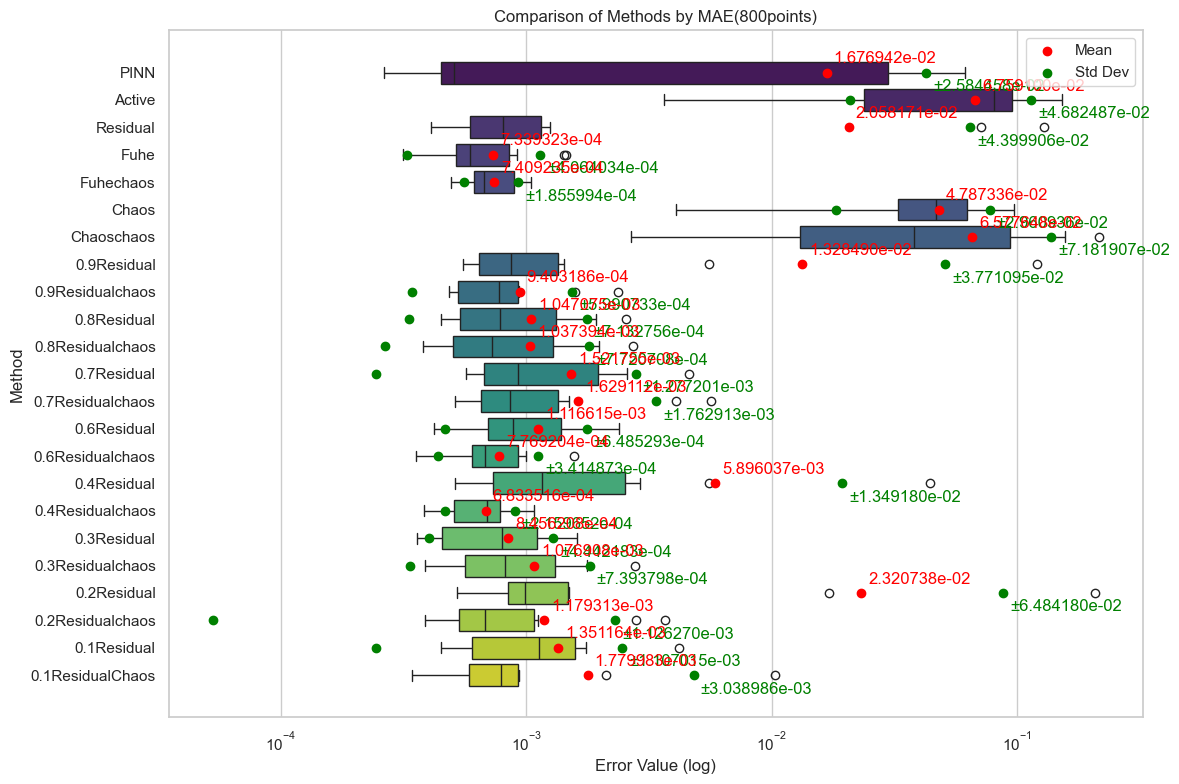

In [16]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


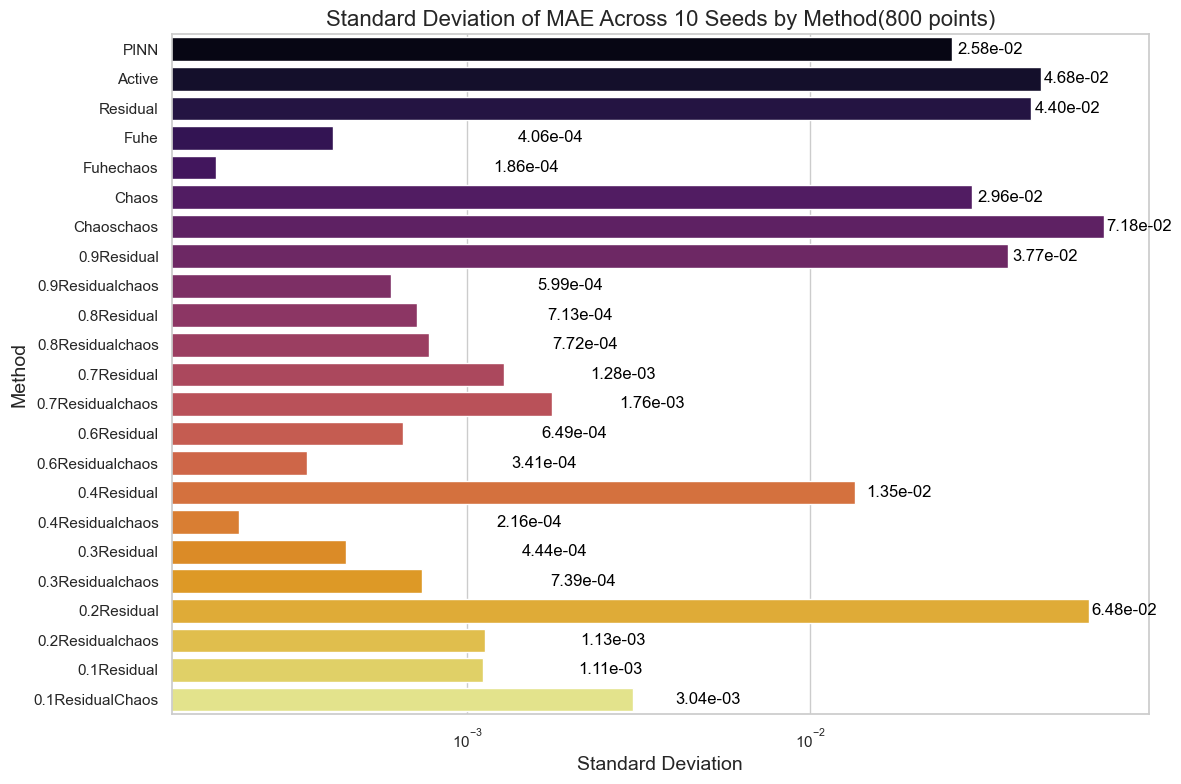

In [17]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

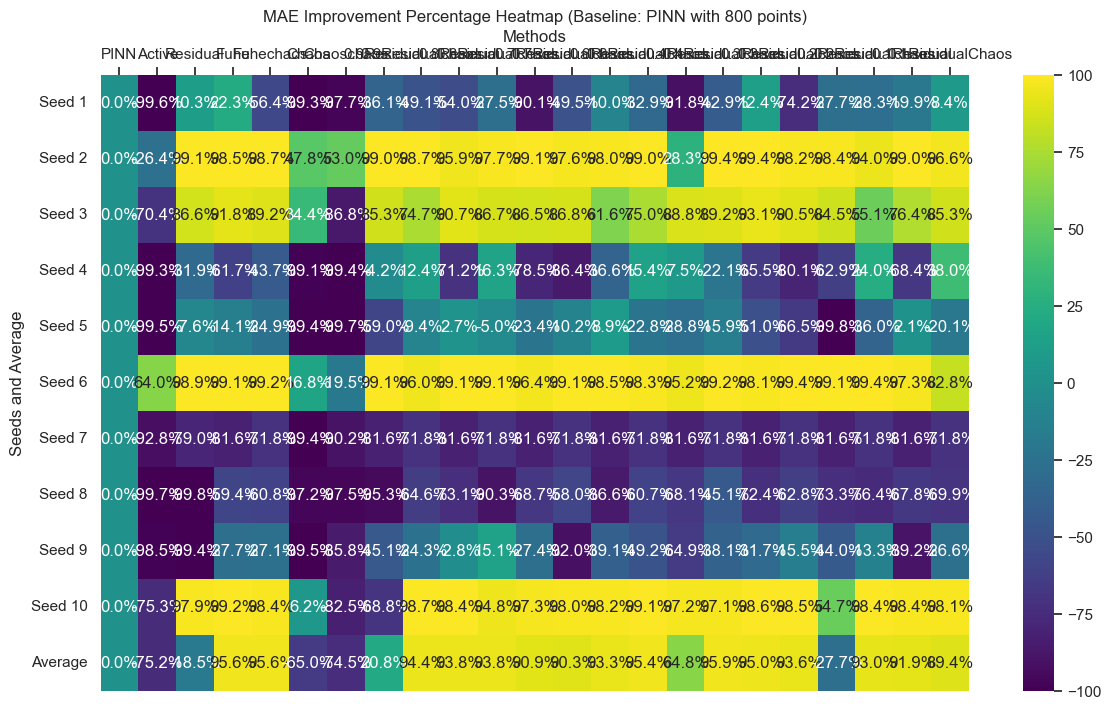

In [18]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



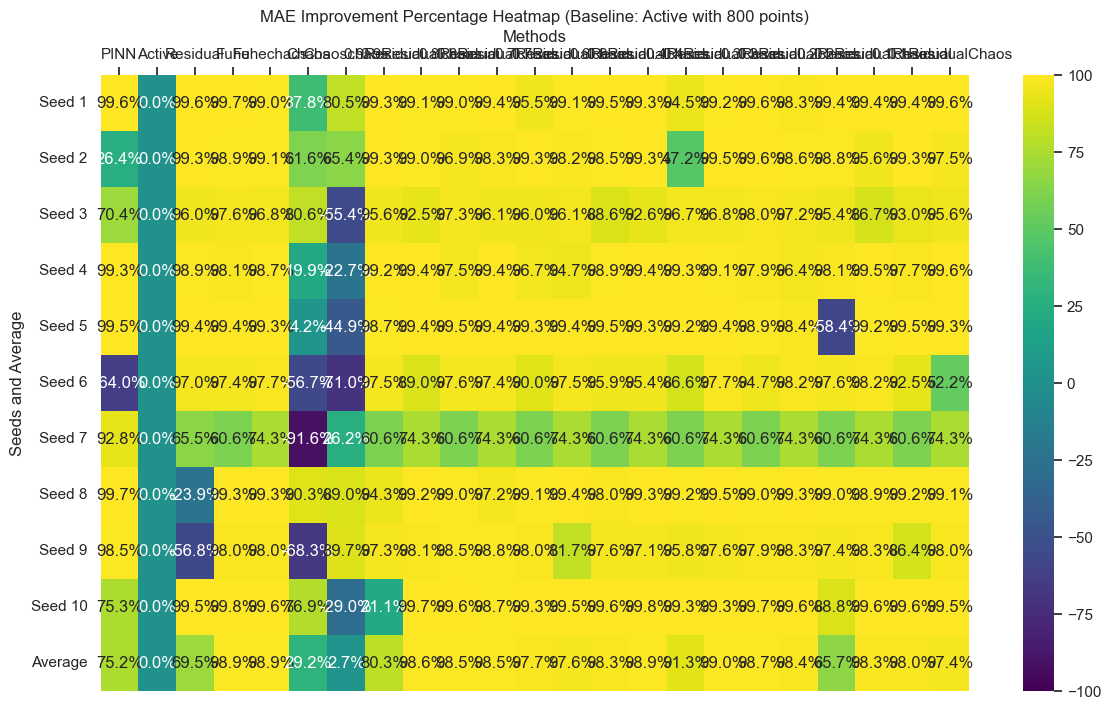

In [19]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



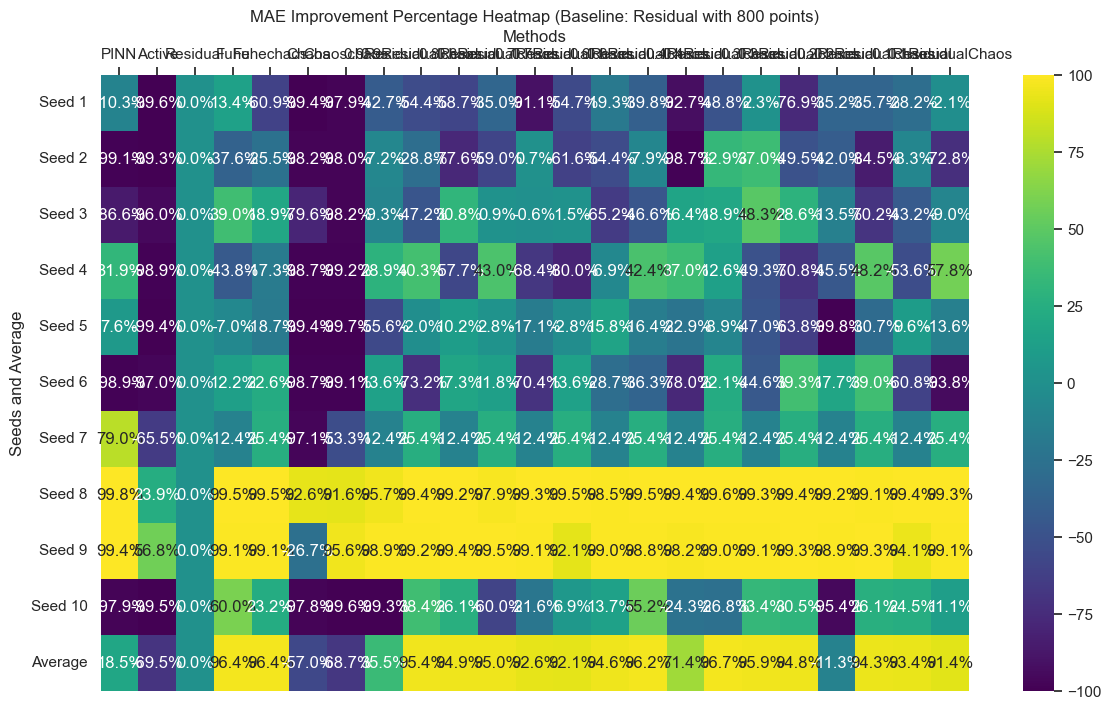

In [20]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



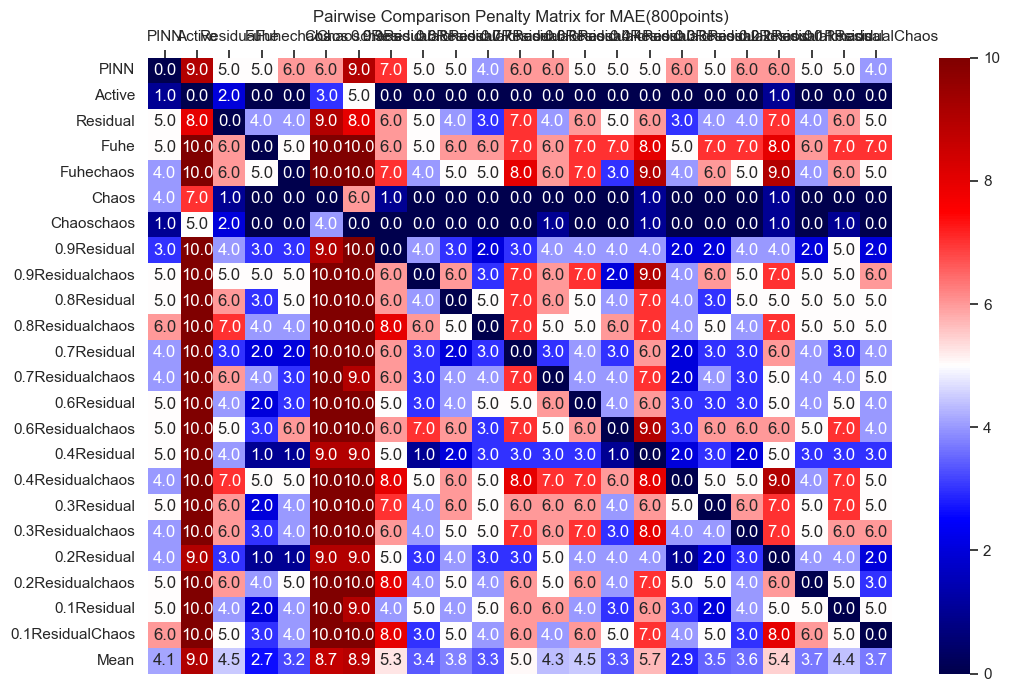

In [21]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [22]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [6.921091002359169e-06, 0.09240412635069457, 0.004998468220644346, 3.086363950964886e-05, 5.3452818239436795e-06, 0.09283944545393634, 6.229818871925989e-07, 7.542251432106574e-07, 6.777858014724389e-06, 0.05387527336453719], 'Active': [0.13874661366907612, 0.133223988587768, 0.020038965054470628, 0.10823598511857441, 0.121758528447034, 0.029889388136603273, 0.0016569860140290783, 0.14963465145170743, 0.04477187580204935, 0.22850520595387028], 'Residual': [9.551451743078132e-07, 6.454916925046713e-06, 1.1909226903043303e-05, 1.8295899098122542e-05, 1.8864442948084866e-06, 2.4682230106535

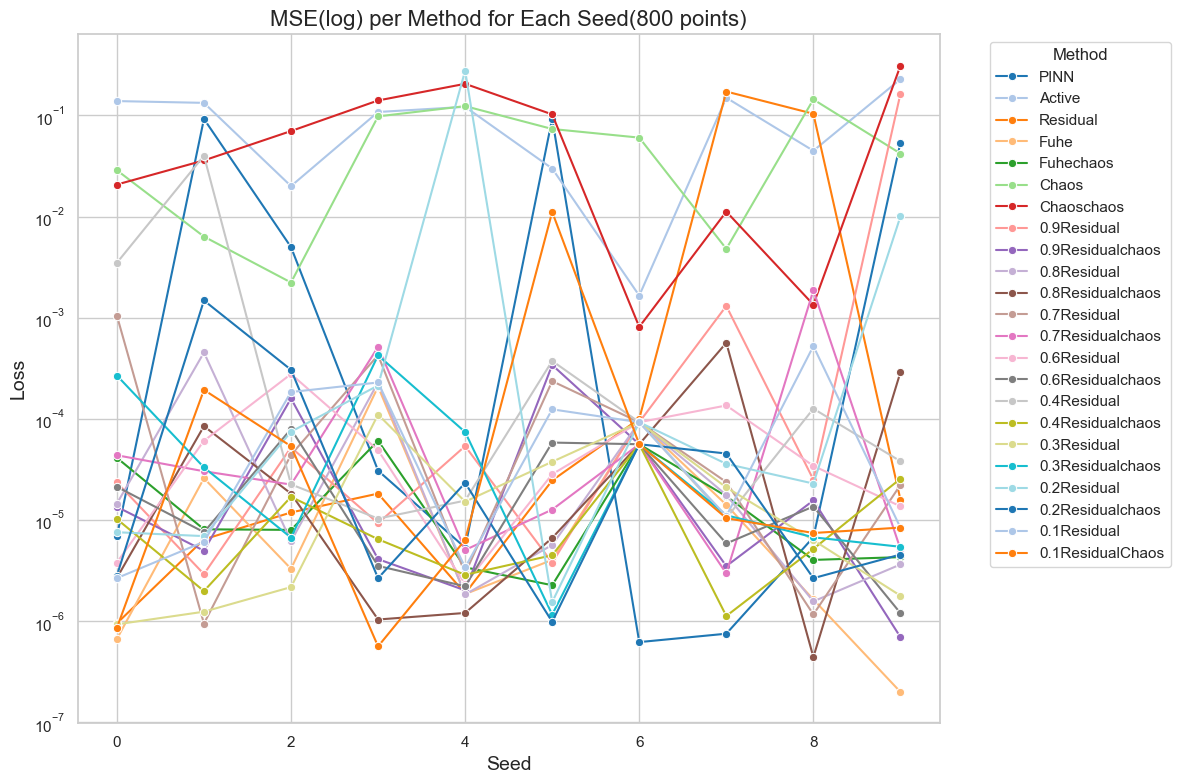

In [23]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

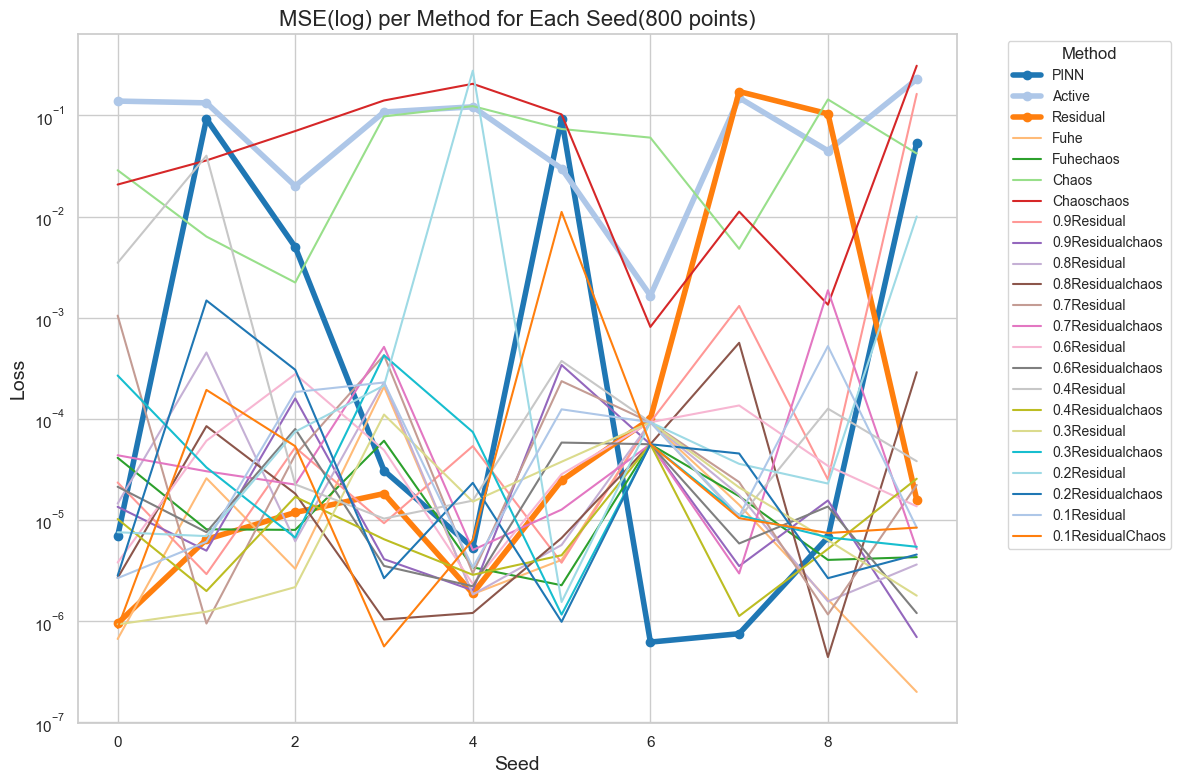

In [24]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\2163168095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_27764\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


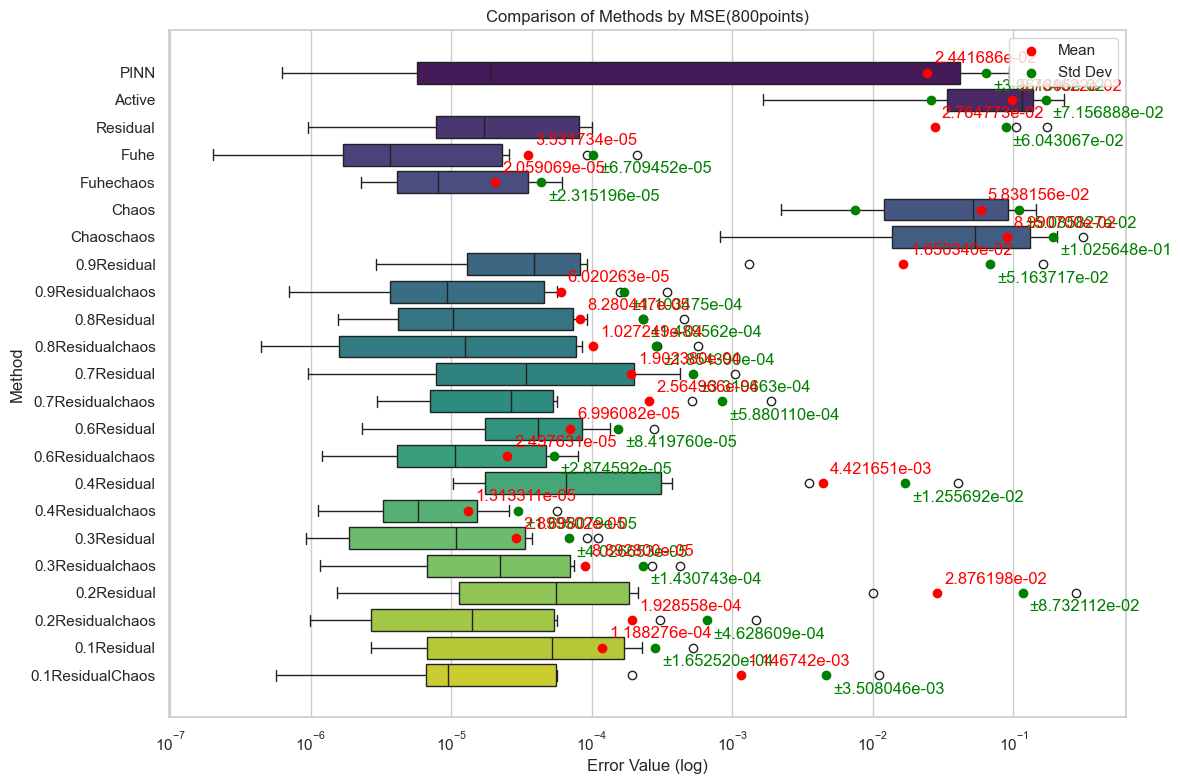

In [25]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [26]:
def rmse_to_mse(rmse):
    """
    将 RMSE 转换为 MSE。
    
    参数:
        rmse (float 或 list 或 numpy array): 均方根误差值
    
    返回:
        mse: 对应的均方误差值
    """
    import numpy as np
    rmse = np.array(rmse)
    mse = rmse ** 2
    return mse

rmse_to_mse(0.0003632)
rmse_to_mse([0.0003632, 0.0131793])

array([1.31914240e-07, 1.73693948e-04])

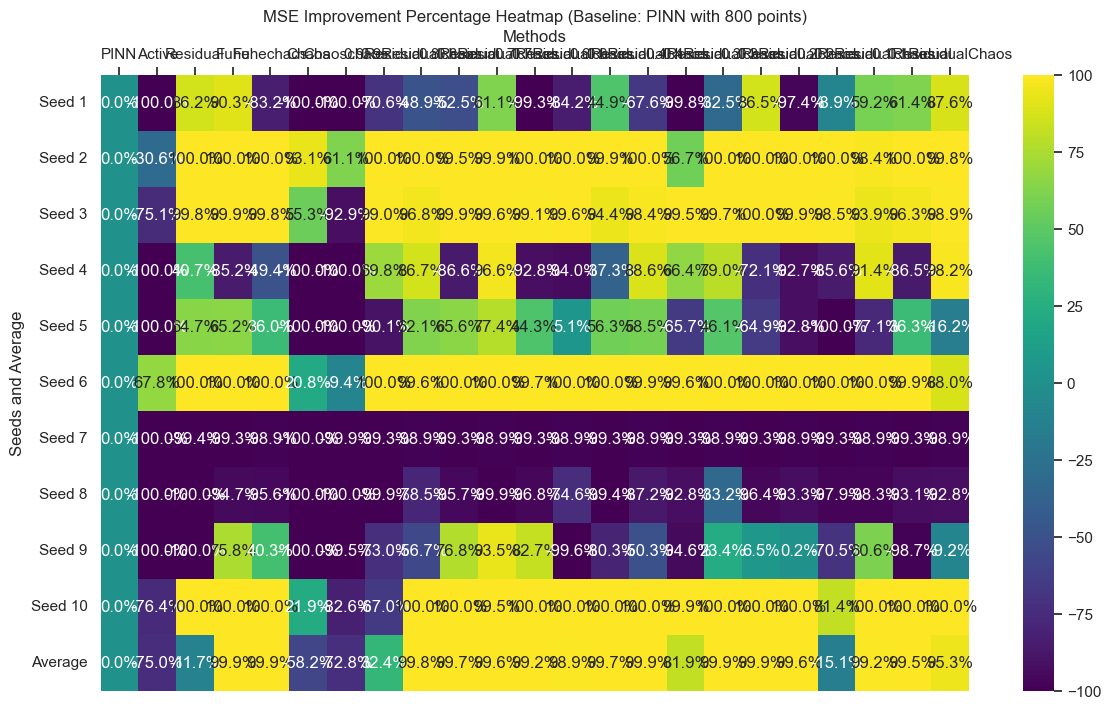

In [27]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



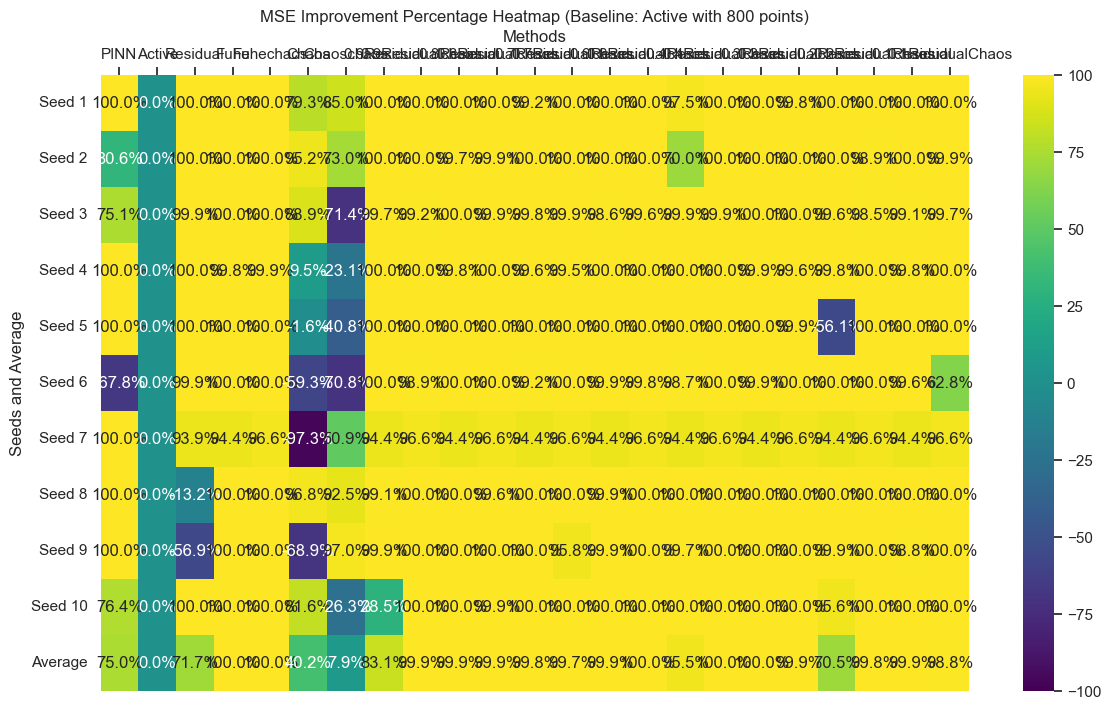

In [28]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



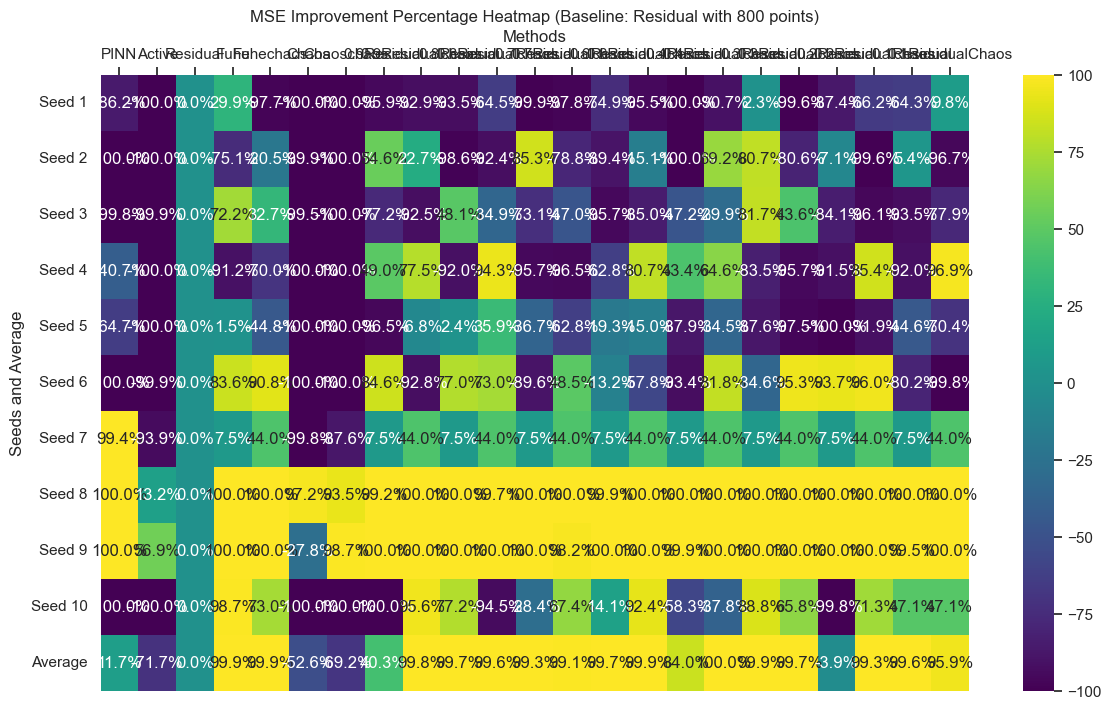

In [29]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



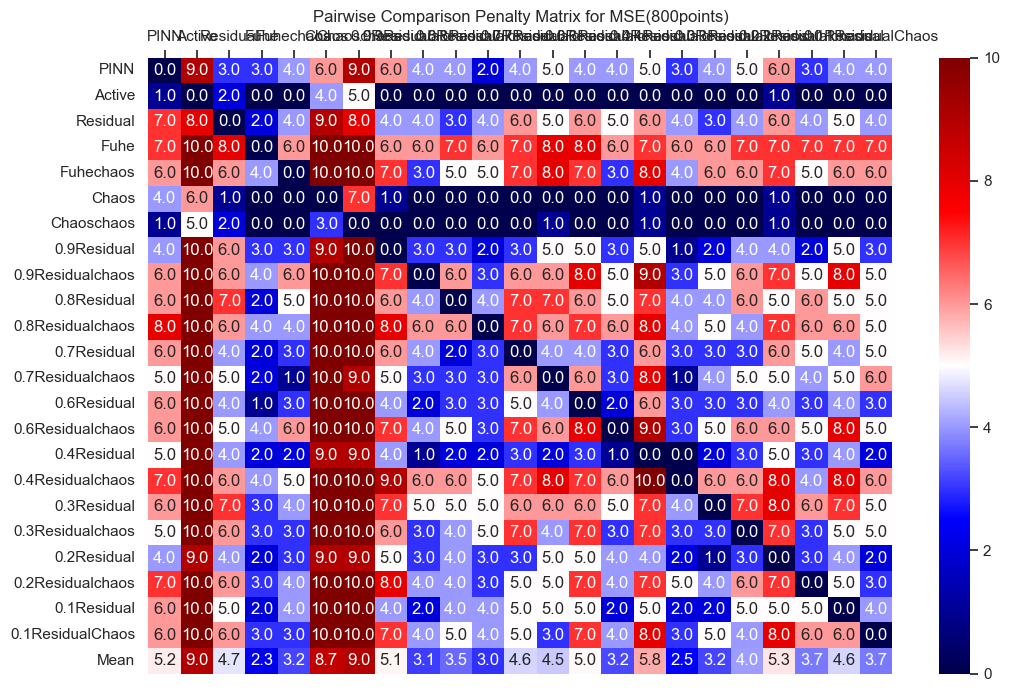

In [30]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [31]:
np.sqrt(2.889226e-06)

0.0016997723376970223